## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Obtaining The Data
**Objectives:**

1. Import Data & Libraries 
2. Preview Data & Analyze dtypes
3. Determine Continuous/Categorical Features
5. Identify Features with Inaccurate Values

## Import data & Libraries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

## Preview Data & Analyze dtypes

In [196]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Both date and sqft_basement are objects and need to be converted

In [198]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [199]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Determine Continuous/Categorical Features

In [200]:
cont_vars = ['price','date','sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','yr_built','yr_renovated'] 
cat_vars = ['price','bedrooms','bathrooms','floors','waterfront','view','condition','grade', 'zipcode']

df_cont = df[cont_vars]
df_cat = df[cat_vars]

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


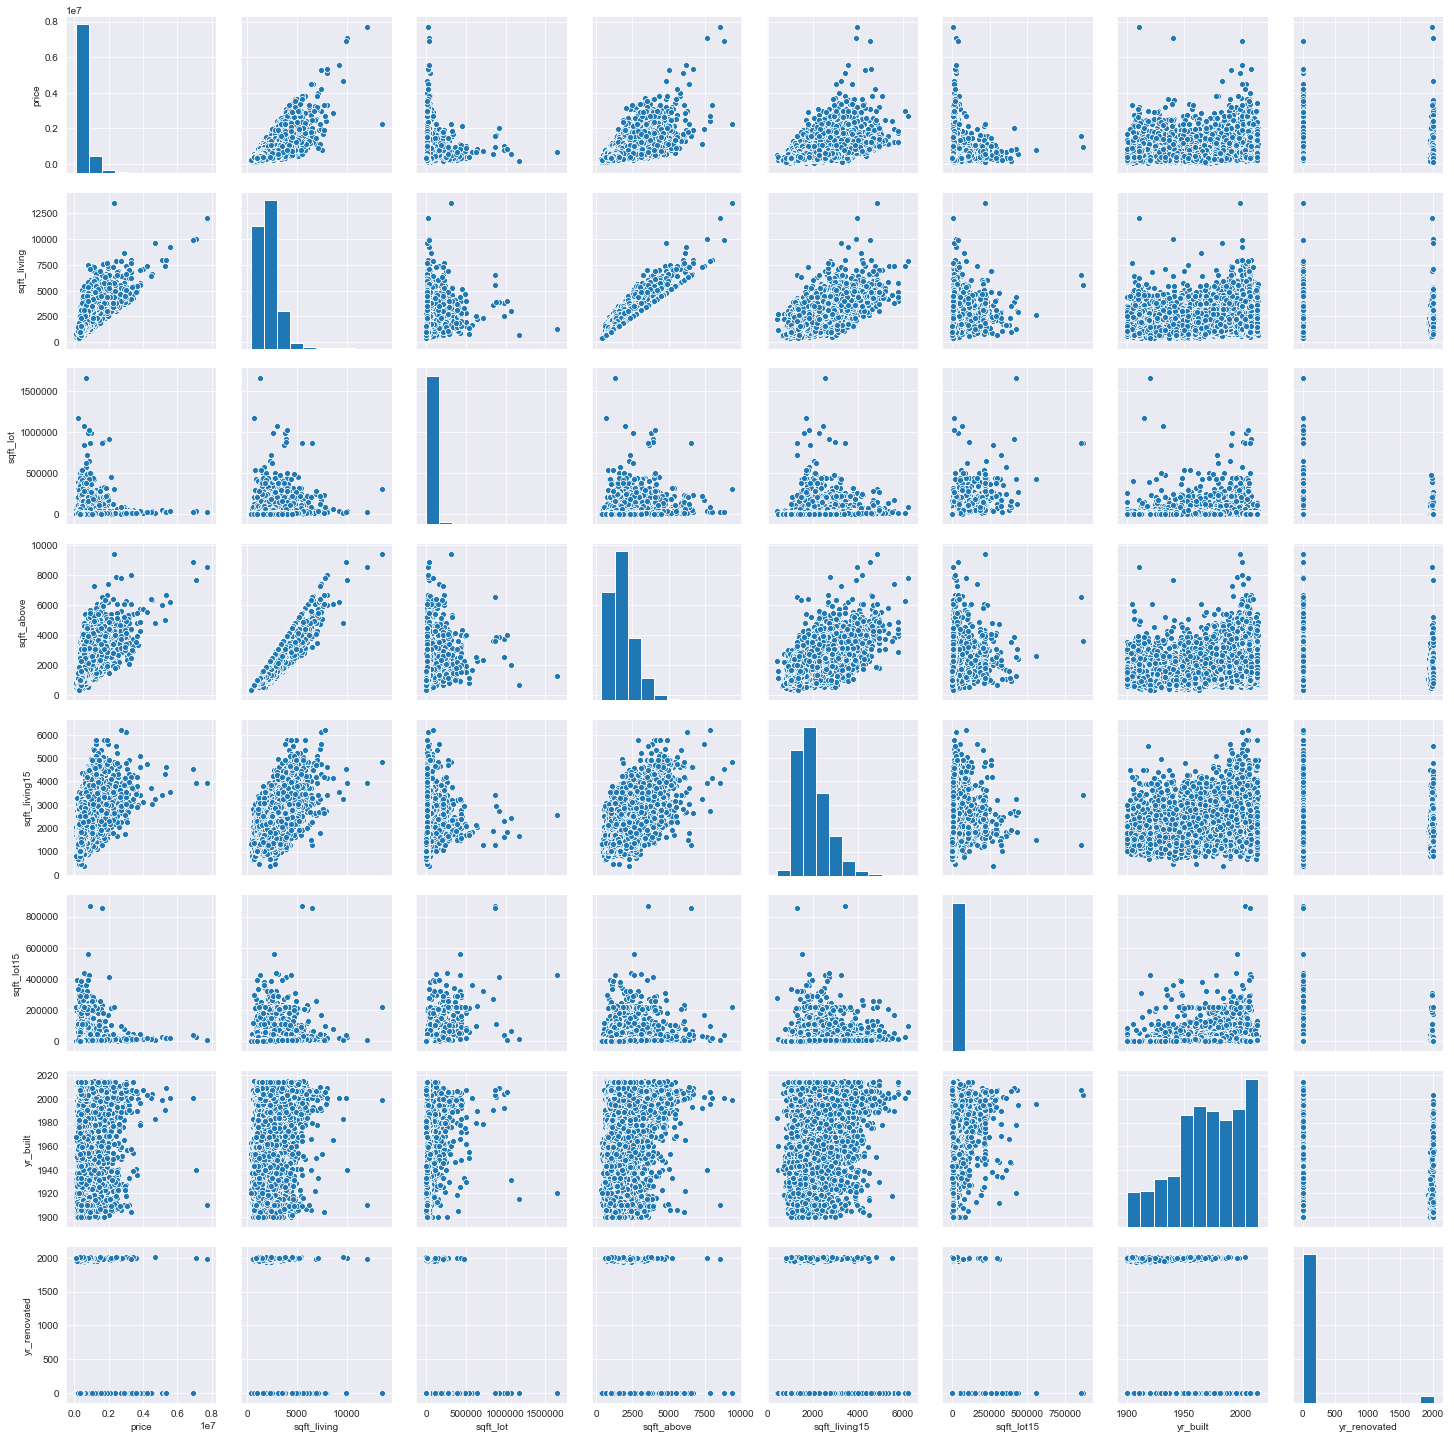

In [201]:
sns.pairplot(df_cont)

In [202]:
df_cont.corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,yr_built,yr_renovated
price,1.000000,0.701917,0.089876,0.605368,0.585241,0.082845,0.053953,0.129599
sqft_living,0.701917,1.000000,0.173453,0.876448,0.756402,0.184342,0.318152,0.055660
sqft_lot,0.089876,0.173453,1.000000,0.184139,0.144763,0.718204,0.052946,0.004513
sqft_above,0.605368,0.876448,0.184139,1.000000,0.731767,0.195077,0.424037,0.022137
sqft_living15,0.585241,0.756402,0.144763,0.731767,1.000000,0.183515,0.326377,-0.000247
sqft_lot15,0.082845,0.184342,0.718204,0.195077,0.183515,1.000000,0.070777,0.003852
yr_built,0.053953,0.318152,0.052946,0.424037,0.326377,0.070777,1.000000,-0.225209
yr_renovated,0.129599,0.055660,0.004513,0.022137,-0.000247,0.003852,-0.225209,1.000000


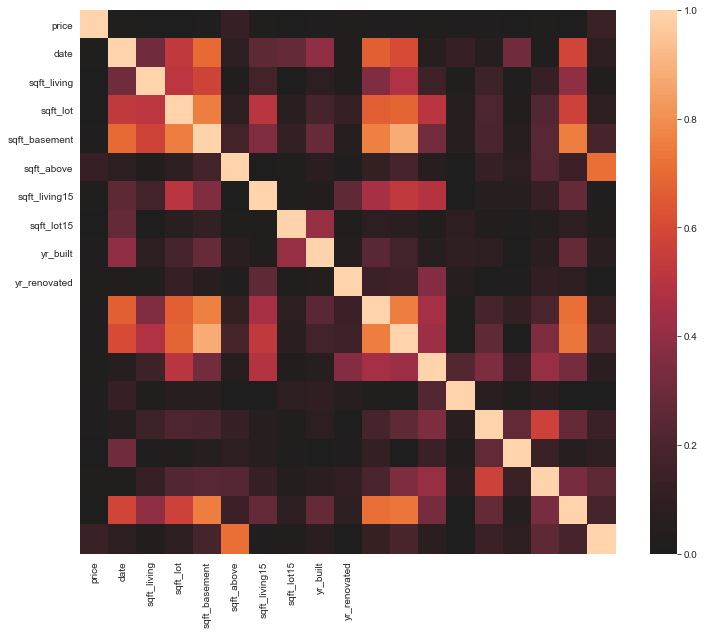

In [203]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df_cont.columns.values, yticklabels=df_cont.columns.values);

Correlations above 0.80 = sqft_living + sqft_above (.88)

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


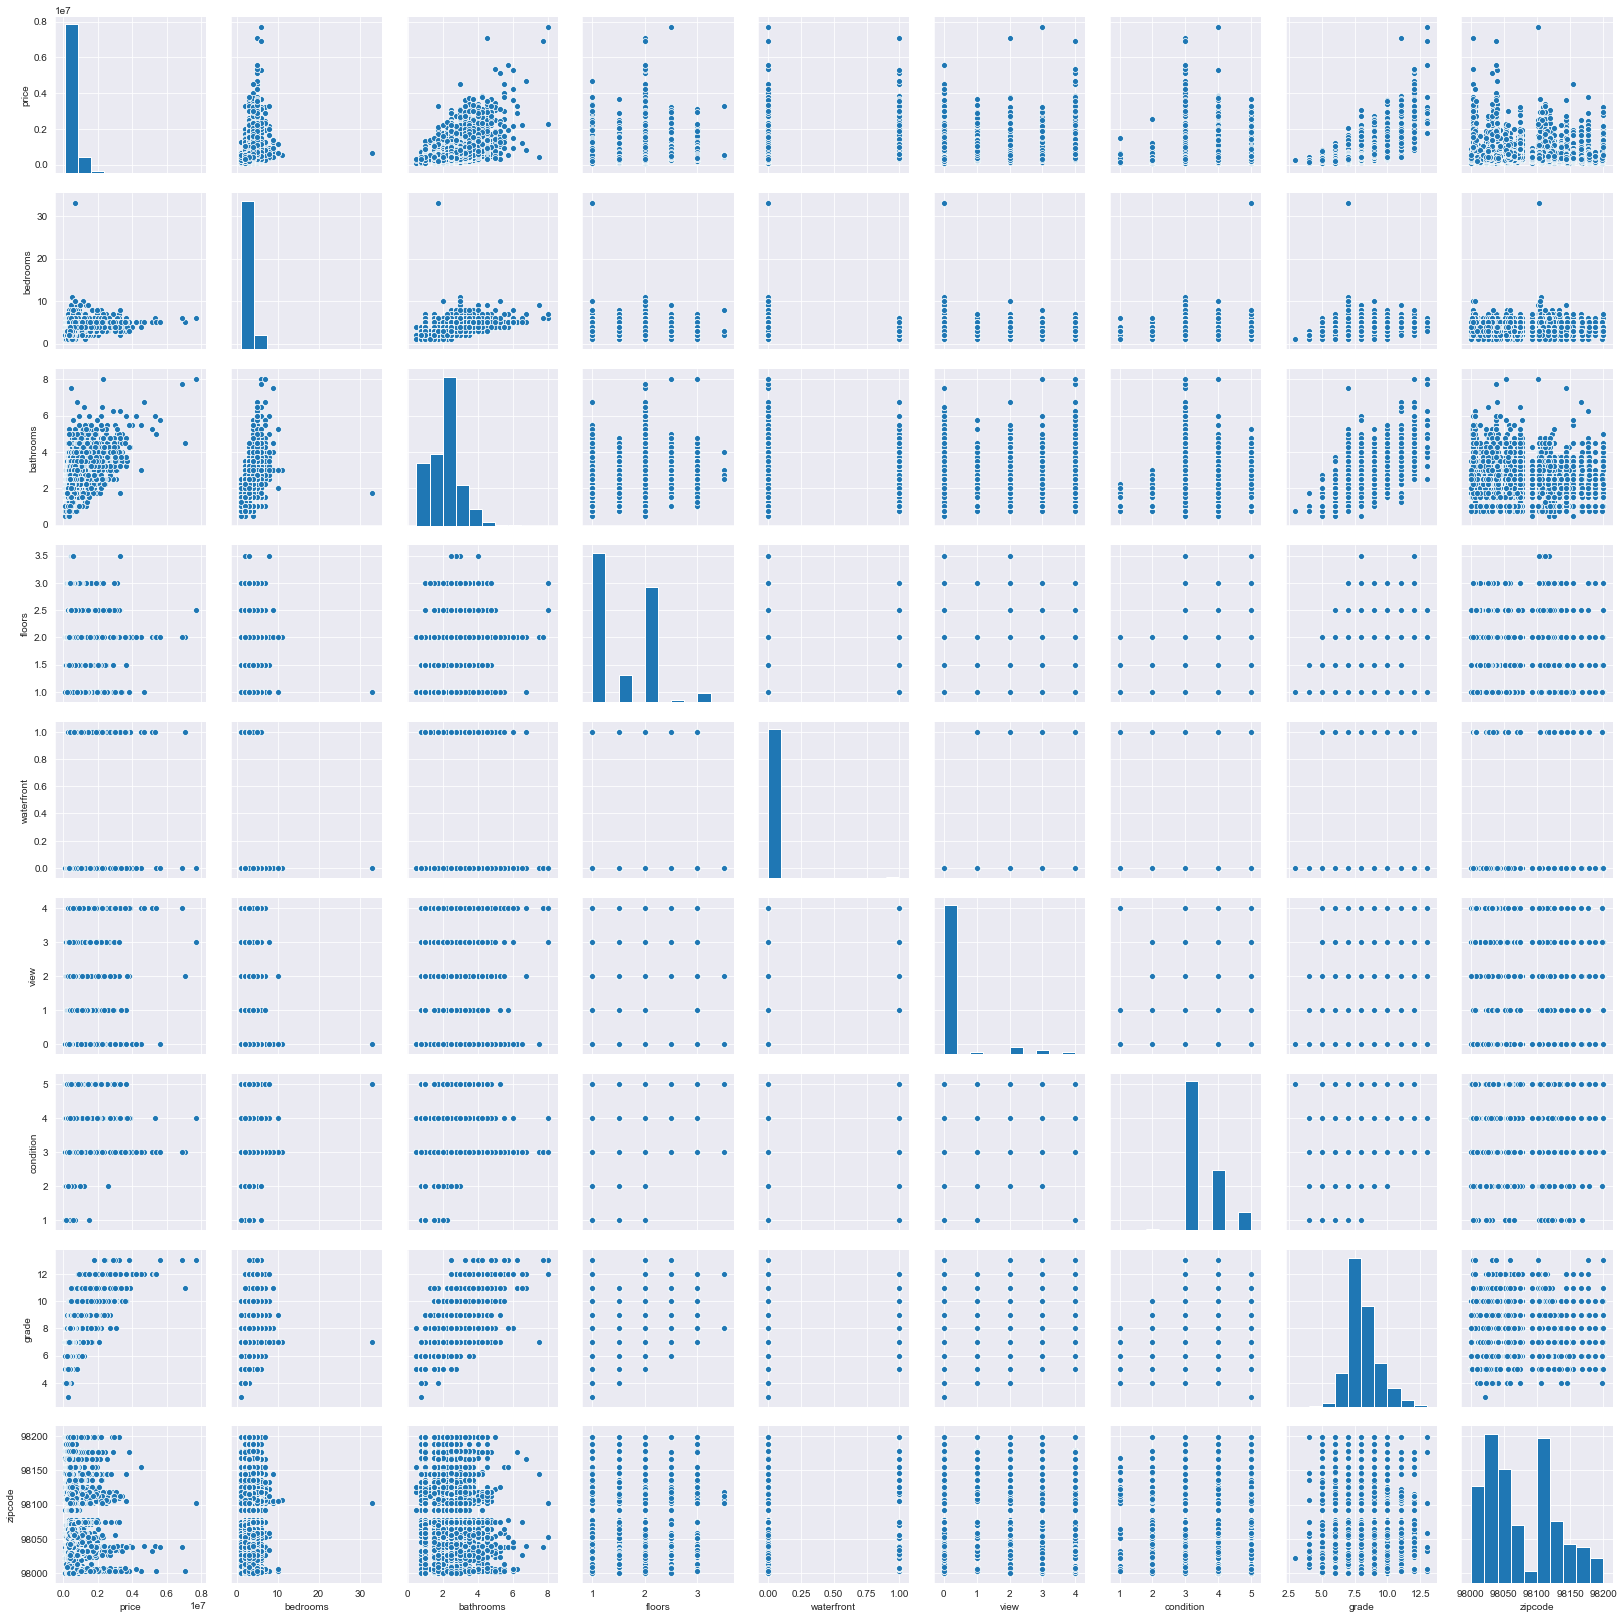

In [204]:
sns.pairplot(df_cat)

In [205]:
df_cat.corr() >0.8

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode
price,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False
view,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,False,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,False,True


In [206]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


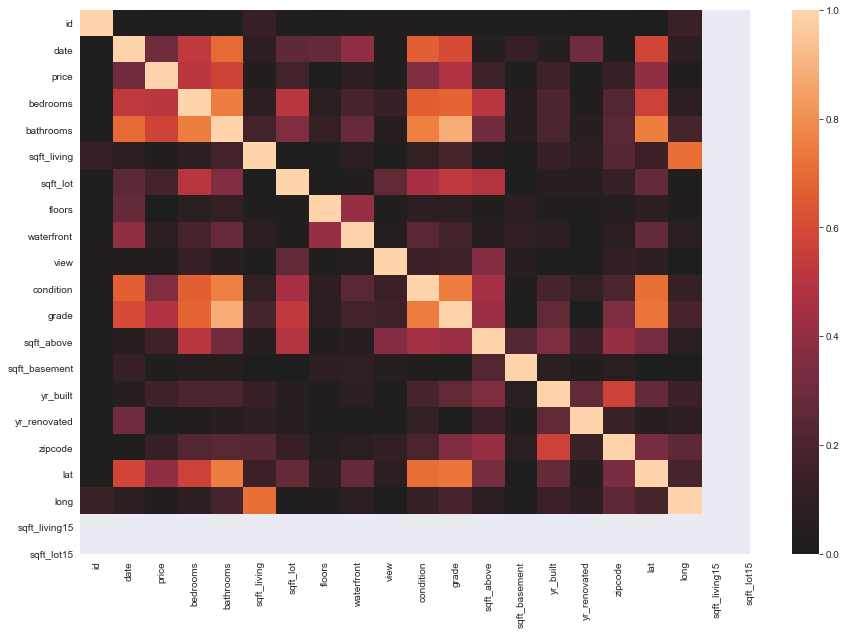

In [207]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

## Identify Features with Inaccurate or Null Values

In [208]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Features with null Values -> Waterfront, View, yr_renovated

Features with Inaccurate Values -> sqft_basement

In [209]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [210]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [211]:
df['yr_renovated'].value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [212]:
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [213]:
df['sqft_lot15'].value_counts().head()

5000    427
4000    356
6000    288
7200    210
4800    145
Name: sqft_lot15, dtype: int64

In [214]:
df['sqft_living15'].value_counts().head()

1540    197
1440    195
1560    192
1500    180
1460    169
Name: sqft_living15, dtype: int64

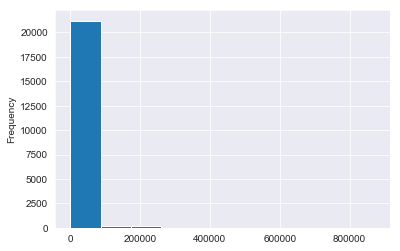

In [215]:
df['sqft_lot15'].plot.hist()

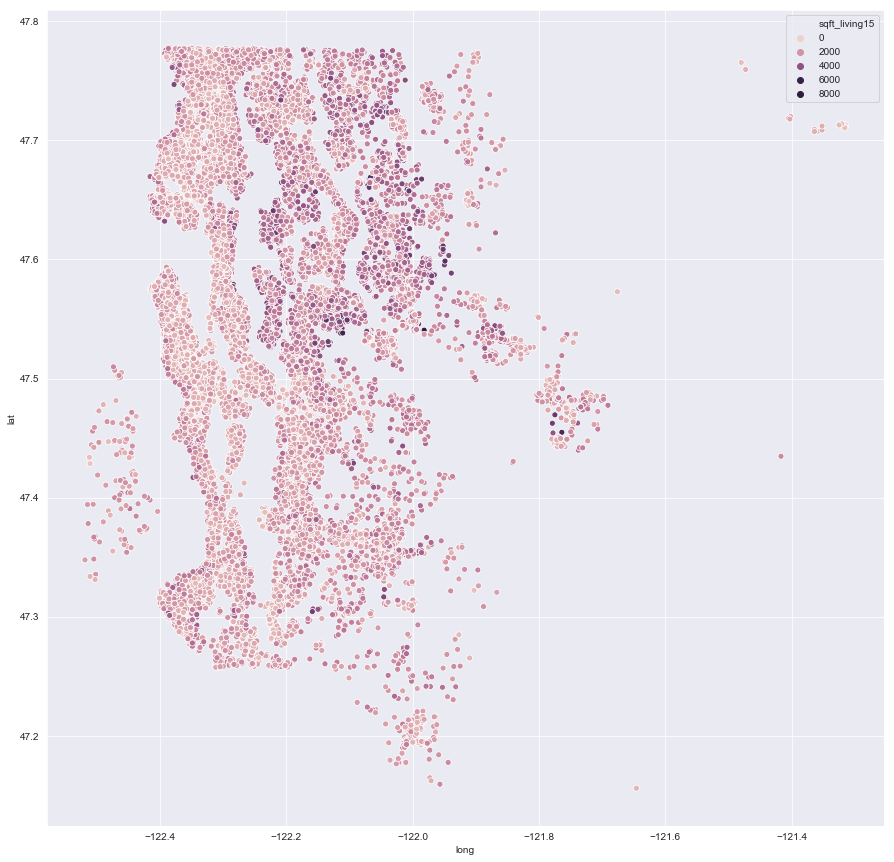

In [216]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='long', y='lat', hue='sqft_living15', data=df)

# Cleaning & Convert Data

**Objectives:**

1. Convert Date Feature
2. Convert Sqft_Basement Feature
3. Clean Waterfront Data & Initialize Dummies
4. Clean View Data & Initialize Dummies
5. Initialize Bedroom Dummies
6. Initialize Bathroom Dummies
7. Initialize Condition Dummies
8. Initialize Grade Dummies

## Convert Date Feature

In [217]:
#Convert Date
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

## Convert Sqft_Basement Feature

### FUNCTION: Str_Changer

count    21597.000000
mean       285.737602
std        439.806196
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64


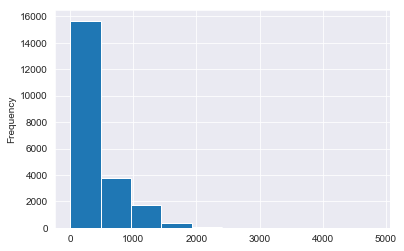

In [218]:
#sqft_basement conversion

df['sqft_basement'] = df['sqft_basement'].astype(str)
df['sqft_basement'].value_counts()

def str_changer(value, string=None, replacement=None):
    if value == string:
        value = replacement
    return value

df['sqft_basement'] = df['sqft_basement'].map(lambda x: str_changer(value=x,string='?', replacement='1'))
df['sqft_basement'] = df['sqft_basement'].astype(float)
print(df['sqft_basement'].describe())
df['sqft_basement'].plot.hist()


##  Clean Waterfront Feature

**We need to decide what to do with the NaN values for this feature.  Let's take a closer look at the data to choose the optimal course of action!**

In [219]:
print(df['waterfront'].value_counts())
print('The total number of NaN values for Waterfront is {}'.format(df['waterfront'].isna().sum()))

0.0    19075
1.0      146
Name: waterfront, dtype: int64
The total number of NaN values for Waterfront is 2376


In [220]:
df['waterfront'] = df['waterfront'].fillna('Unknown').astype('category')
print(df['waterfront'].value_counts())

0.0        19075
Unknown     2376
1.0          146
Name: waterfront, dtype: int64


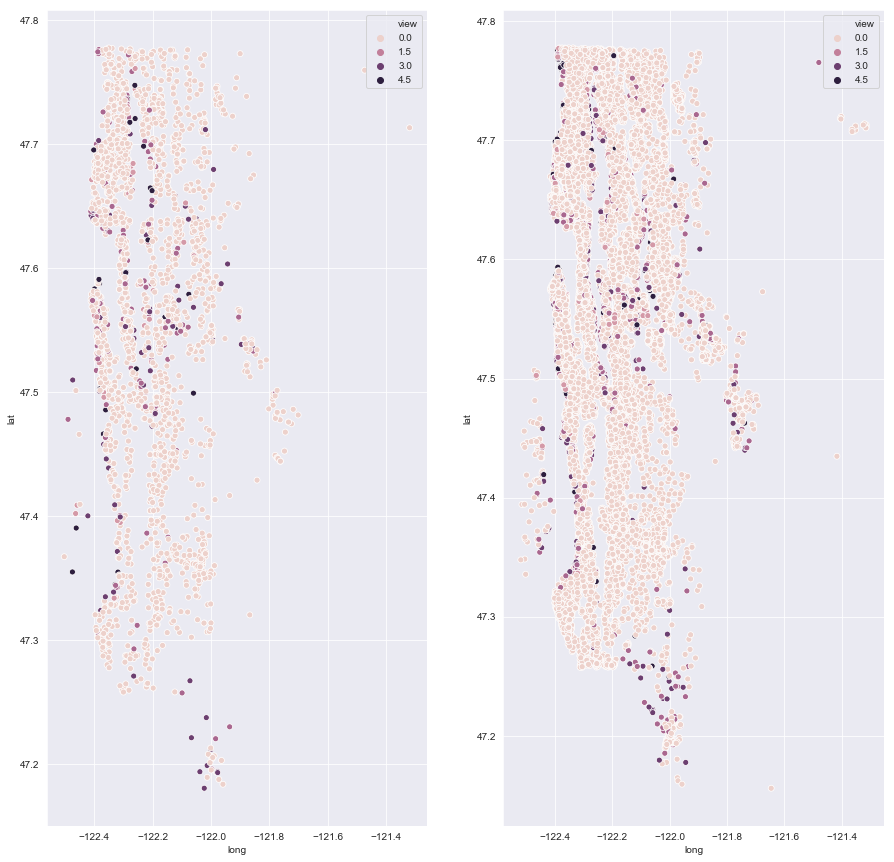

In [221]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,15))

sns.scatterplot(x='long', y='lat', hue='view', data=df[df['waterfront'] == 'Unknown'], ax=ax1)
sns.scatterplot(x='long', y='lat', hue='view', data=df[df['waterfront'] == 0], ax=ax2)

Not much to make from these visualizations, lets have a look at some more data using the groupby method.

In [222]:
df.groupby('waterfront').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,
0.0,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,14991.120210,1.493997,0.203954,3.408965,7.652058,1785.875125,281.467313,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
1.0,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,3.786207,3.541096,8.835616,2508.760274,728.486301,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
Unknown,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,15306.887205,1.486532,0.256540,3.408670,7.632576,1766.194865,292.814394,1970.675084,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084


The houses with waterfronts tend to have larger values for almost all of the features.  It is difficult to tell which features are the most closely related to having a waterfront view however.

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


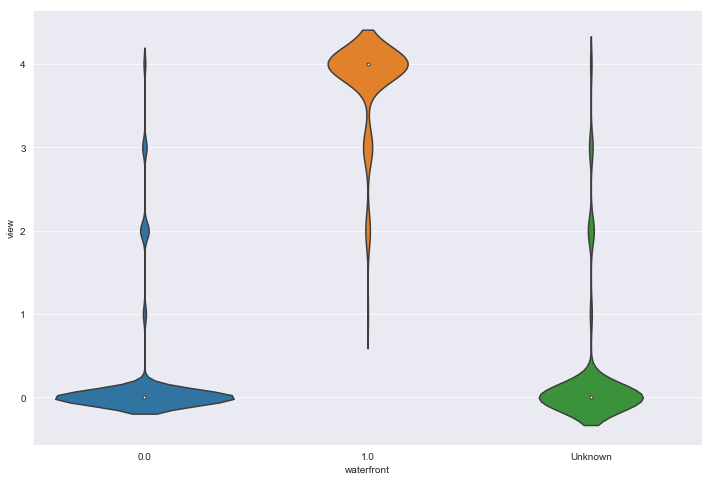

In [223]:
plt.figure(figsize=(12,8))
sns.violinplot('waterfront', 'view', data=df);

In [224]:
print('Number of houses without a waterfront or view: {}'.format(
    df[(df['waterfront'] == 0 ) & (df['view'] == 0)].shape[0]))
print('Number of houses without a waterfront and have 1 view: {}'.format(
    df[(df['waterfront'] == 0 ) & (df['view'] == 1)].shape[0]))
print('Number of houses without a waterfront and more than 1 view: {}'.format(
    df[(df['waterfront'] == 0 ) & (df['view'] > 1)].shape[0]))

Number of houses without a waterfront or view: 17312
Number of houses without a waterfront and have 1 view: 290
Number of houses without a waterfront and more than 1 view: 1417


In [225]:
print('Number of houses with a waterfront but no view: {}'.format(
    df[(df['waterfront'] == 1 ) & (df['view'] == 0)].shape[0]))
print('Number of houses with a waterfront and have 1 view: {}'.format(
    df[(df['waterfront'] == 1 ) & (df['view'] == 1)].shape[0]))
print('Number of houses with a waterfront and more than 1 view: {}'.format(
    df[(df['waterfront'] == 1 ) & (df['view'] > 1)].shape[0]))

Number of houses with a waterfront but no view: 0
Number of houses with a waterfront and have 1 view: 1
Number of houses with a waterfront and more than 1 view: 144


In [226]:
print('Number of houses with UNKNOWN waterfront and no view: {}'.format(
    df[(df['waterfront'] == 'Unknown' ) & (df['view'] == 0)].shape[0]))
print('Number of houses with UNKNOWN waterfront and have 1 view: {}'.format(
    df[(df['waterfront'] == 'Unknown' ) & (df['view'] == 1)].shape[0]))
print('Number of houses with UNKNOWN waterfront and more than 1 view: {}'.format(
    df[(df['waterfront'] == 'Unknown' ) & (df['view'] > 1)].shape[0]))

Number of houses with UNKNOWN waterfront and no view: 2110
Number of houses with UNKNOWN waterfront and have 1 view: 39
Number of houses with UNKNOWN waterfront and more than 1 view: 221


## Clean Yr_Renovated Feature

In [227]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [228]:
df['yr_renovated'].isnull().sum()

3842

In [229]:
df['yr_renovated'] = df['yr_renovated'].fillna(1800)
df['yr_renovated'].value_counts()

0.0       17011
1800.0     3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1959.0        1
1946.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

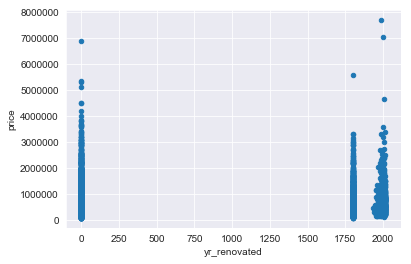

In [230]:
df.plot.scatter(x='yr_renovated', y='price');

**Here we are going to set the "Unknown" renovation status value to the year 1800.  This will be used later on during the feature engineering stages.**

##  Clean View Feature

In [231]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

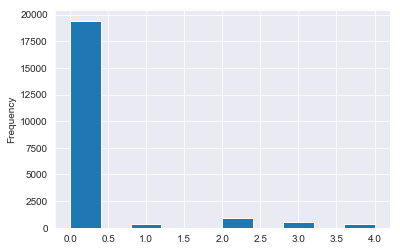

In [232]:
df['view'].plot.hist();

In [233]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [234]:
df[df['view'].isna()].head()
# .groupby('waterfront').mean()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,2014-10-28,480000.0,4,2.50,3230,16171,2.0,0,NaN,...,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,2015-04-06,430000.0,4,2.50,2070,4310,2.0,0,NaN,...,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,2014-08-04,840000.0,4,1.75,2480,11010,1.0,0,NaN,...,9,1630,850.0,1966,1800.0,98040,47.5378,-122.219,2770,10744
487,1895000260,2014-07-21,207950.0,2,2.00,890,5000,1.0,0,NaN,...,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000


In [235]:
df['view'] = df['view'].fillna(0.5)
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
0.5       63
Name: view, dtype: int64

# Create Baseline Dummies

** Do all of these in one or two cells for the final notebook!**

## Initialize Waterfront Dummies

For now we will leave the category as "Unknown" and drop the first column.  This will mean that out first model will have NO waterfront as a reference feature. We can have a look at the significance of this category after our initial model and make a decision then.

In [236]:
wtr_dummies = pd.get_dummies(df['waterfront'], prefix='Wtr', drop_first=True, dtype=int)
wtr_dummies.columns

Index(['Wtr_1.0', 'Wtr_Unknown'], dtype='object')

##  Initialize Bedroom Dummies

In [237]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [238]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Things look okay here, let's go ahead and create a standard dummy for this feature.

In [239]:
bed_dummies = pd.get_dummies(df['bedrooms'], prefix = 'bed', drop_first=True, dtype=int)
bed_dummies.head()

,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


##  Initialize Bathroom Dummies

In [240]:
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [241]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Things look okay here, let's go ahead and create a standard dummy for this feature.

In [242]:
bath_dummies = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True, dtype=int)
bath_dummies.head()

,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,...,bath_5.25,bath_5.5,bath_5.75,bath_6.0,bath_6.25,bath_6.5,bath_6.75,bath_7.5,bath_7.75,bath_8.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Initialize Condition Dummies

In [243]:
df['condition'].describe()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [244]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

Things look okay here, let's go ahead and create a standard dummy for this feature.

In [245]:
cond_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first=True, dtype=int)
cond_dummies.head()

,cond_2,cond_3,cond_4,cond_5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


## Initialize Floors Dummies

In [246]:
df['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [247]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [248]:
flr_dummies = pd.get_dummies(df['floors'], prefix='flr', drop_first=True, dtype=int)
flr_dummies.head()

,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


##  Initialize Grade Dummies

In [249]:
df['grade'].describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [250]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Things look okay here, let's go ahead and create a standard dummy for this feature.

In [251]:
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True, dtype=int)
grade_dummies.head()

,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


## Initialize View Dummies

In [252]:
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True, dtype=int)
view_dummies.head()

,view_0.5,view_1.0,view_2.0,view_3.0,view_4.0
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


##  Initialize ZipCode Dummies

In [253]:
df['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [254]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Things look okay here, let's go ahead and create a standard dummy for this feature.

In [255]:
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True, dtype=int)
zip_dummies.head()

,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Initial Model & Observations

In [256]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Create Initial Model DataFrame

In [257]:
dummy_df_list = np.array([wtr_dummies, view_dummies, bed_dummies, bath_dummies, cond_dummies, grade_dummies, flr_dummies, zip_dummies])


df_model_base = df.copy()


df_model_base = df_model_base.drop(['id', 'date' ,'waterfront', 'view', 'bedrooms', 'bathrooms', 'condition', 'grade', 'floors', 'zipcode', 'lat', 'long'], axis=1)
df_model_base = pd.concat([df_model_base, wtr_dummies, view_dummies, bed_dummies, bath_dummies, cond_dummies, grade_dummies, flr_dummies, zip_dummies], axis=1)

df_model_base.columns = [x.replace('.', '_') for x in df_model_base]

df_model_base.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Wtr_1_0,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,1180,5650,1180,0.0,1955,0.0,1340,5650,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,2570,7242,2170,400.0,1951,1991.0,1690,7639,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,10000,770,0.0,1933,1800.0,2720,8062,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,910.0,1965,0.0,1360,5000,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1680,8080,1680,0.0,1987,0.0,1800,7503,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
df_model_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 143 entries, price to zip_98199
dtypes: float64(3), int32(134), int64(6)
memory usage: 12.5 MB


In [259]:
outcome = 'price'
predictors = df_model_base.drop('price', axis=1).columns
pred_sum = '+'.join(predictors)
formula1 = outcome + '~' + pred_sum
formula1
# pred_sum

'price~sqft_living+sqft_lot+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15+Wtr_1_0+Wtr_Unknown+view_0_5+view_1_0+view_2_0+view_3_0+view_4_0+bed_2+bed_3+bed_4+bed_5+bed_6+bed_7+bed_8+bed_9+bed_10+bed_11+bed_33+bath_0_75+bath_1_0+bath_1_25+bath_1_5+bath_1_75+bath_2_0+bath_2_25+bath_2_5+bath_2_75+bath_3_0+bath_3_25+bath_3_5+bath_3_75+bath_4_0+bath_4_25+bath_4_5+bath_4_75+bath_5_0+bath_5_25+bath_5_5+bath_5_75+bath_6_0+bath_6_25+bath_6_5+bath_6_75+bath_7_5+bath_7_75+bath_8_0+cond_2+cond_3+cond_4+cond_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13+flr_1_5+flr_2_0+flr_2_5+flr_3_0+flr_3_5+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_9807

In [260]:
model_base = ols(formula=formula1, data=df_model_base).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     800.6
Date:                Sat, 18 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:24:54   Log-Likelihood:            -2.8752e+05
No. Observations:               21597   AIC:                         5.753e+05
Df Residuals:                   21454   BIC:                         5.765e+05
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.858e+05   2.06e+05      2.839      0.005    1.81e+05     9.9e+05
sqft_living      97.8507     13.294      7.361      0.000      71.794     123.908
sqft_lot          0.2445      0.035      6.939      0.000       0.175       0.314
sqft_above       56.2821     13.345      4.217      0.000      30.124      82.440
sqft_basement    13.3392     13.155      1.014      0.311     -12.446      39.124
yr_built       -314.2273     62.147     -5.056      0.000    -436.040    -192.414
yr_renovated      6.9794      1.359      5.137      0.000       4.316       9.642
sqft_living15    21.7509      2.706      8.039      0.000      16.447      27.054
sqft_lot15       -0.1943      0.055     -3.503      0.000      -0.303      -0.086
Wtr_1_0        6.031e+05   1.52e+04     39.576      0.000    5.73e+05    6.33e+05
Wtr_Unknown    -421.7904   3204.321     -0.132      0.895   -6702.498    5858.917
view_0_5       4.129e+04   1.86e+04      2.218      0.027    4804.249    7.78e+04
view_1_0       8.989e+04   8381.670     10.725      0.000    7.35e+04    1.06e+05
view_2_0       6.956e+04   5124.057     13.576      0.000    5.95e+04    7.96e+04
view_3_0       1.499e+05   7006.925     21.392      0.000    1.36e+05    1.64e+05
view_4_0       2.895e+05   1.06e+04     27.312      0.000    2.69e+05     3.1e+05
bed_2          6486.3796   1.13e+04      0.573      0.567   -1.57e+04    2.87e+04
bed_3          1.484e+04   1.14e+04      1.308      0.191   -7406.160    3.71e+04
bed_4          -823.6681   1.16e+04     -0.071      0.943   -2.36e+04    2.19e+04
bed_5         -1.544e+04   1.22e+04     -1.263      0.207   -3.94e+04    8523.053
bed_6         -4.838e+04   1.49e+04     -3.248      0.001   -7.76e+04   -1.92e+04
bed_7         -1.882e+05   2.73e+04     -6.898      0.000   -2.42e+05   -1.35e+05
bed_8          -6.27e+04   4.32e+04     -1.450      0.147   -1.47e+05     2.2e+04
bed_9         -1.678e+05   6.77e+04     -2.481      0.013      -3e+05   -3.52e+04
bed_10        -3.179e+05    8.7e+04     -3.655      0.000   -4.88e+05   -1.47e+05
bed_11        -2.977e+04   1.48e+05     -0.202      0.840   -3.19e+05     2.6e+05
bed_33         4.682e+04   1.47e+05      0.317      0.751   -2.42e+05    3.36e+05
bath_0_75      4452.0581   7.58e+04      0.059      0.953   -1.44e+05    1.53e+05
bath_1_0       3.456e+04   7.36e+04      0.469      0.639    -1.1e+05    1.79e+05
bath_1_25     -5.223e+04   8.85e+04     -0.590      0.555   -2.26e+05    1.21e+05
bath_1_5       2.795e+04   7.37e+04      0.379      0.705   -1.17e+05    1.72e+05
bath_1_75      2.606e+04   7.37e+04      0.354      0.724   -1.18e+05    1.71e+05
bath_2_0       2.821e+04   7.37e+04      0.383      0.702   -1.16e+05    1.73e+05
bath_2_25      4.533e+04   7.37e+04      0.615      0.539   -9.92e+04     1.9e+05
bath_2_5       3.563e+04   7.37e+04      0.483   

Interesting Features:

Continuous
Strong
sqft_living - 97 co, pg
sqft_above - 56 co, pg
yr_built - (-314_, pg


Meh
sqft_lot - 0.2 co, pg
yr_reno - 6.6 co, pg
sqft_living15 - 21 co, pg
sqft_lot15 - -0.9 co, pg

Weak
sqft_basement - 13co, p0.3

Categorical

Waterfront:
Relative to having no waterfront(n=19k/21k)
Huge coefficient with wtr_1 @ 6e5 co, pg
For the houses with "Unknown", relative to having a confirmed 0 waterfront feature, this model shows a negative coefficient.  This however is not stat sig and so I will likely drop these rows.

View:
Relative to having no view(n=19k/21k), we can see that the coefficient generally is increasing as we acquire additional views per home. All data are also stat sig

Bedroom:
Relative to having 1 bedroom(n=196/21k), there doesn't seem to be much consistency with increasing bedrooms meaning a higher sale price.
Need to check for outliers (with # of rooms and within each # as well), also look as sample sizes closer for each category and consider binning.

Bathroom:
Relative to having 0.5 bathrooms(n=4/21k), the data looks too messy to dive into before cleaning the categories a little bit.  I think binning the # of bathrooms and replacing the higher #s with intervals may help clean this up. also consider looking a outliers for bathroom types.

Condition:
Relative to having a condition of 1 (n=29/21k), all of the conditions are positively correlated and stat sig.  However, this feature needs to be cleaned of outliers and changed to reflect the overwhelming number of houses having 3/5 for cond.

Grade:
This is relative to having a grade of 3 (n=1) this is a mess.  Clean outliers and bin based on decent sample sizes and the distribution.

Floor:
Relative to having 1(n=10k/21k),they do not seem to show a positive correlation as we increase in floors but there is a lot to consider for this feature.  For example, 1.5 flrs, split homes, may not be popular in that county.  perhaps there is something about bungaloes in a certain part of the city? 1 floor may be an apartment and need to be segregated by lat/log and/or zip. Lots to dive into here, also almost all are stat sig


Zip code:
They are a big mess here and pretty much useless in this form for analysis.  We're going to arrange these in the logical way they they are used by the postal service and group them using their unique codes. Scraping data from https://www.zip-codes.com/county/wa-king.asp we are going to bring in a table that has these codes associated to their cities.


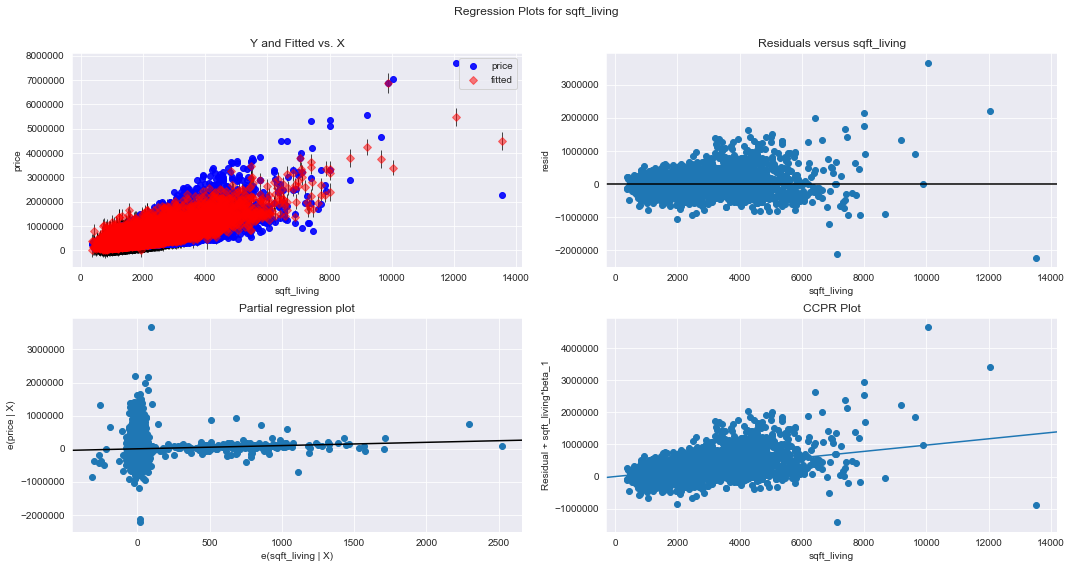

In [261]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_base, 'sqft_living', fig=fig)
plt.show()

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


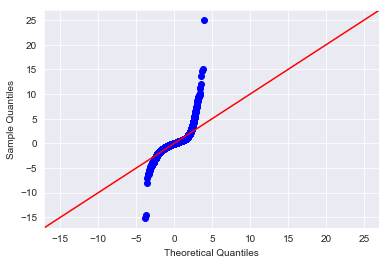

In [262]:
import scipy.stats as stats
residuals = model_base.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Feature Engineering & Model Optimization

In [263]:
from bs4 import BeautifulSoup
import requests

In [264]:
html_page = requests.get('https://www.zip-codes.com/county/wa-king.asp')
soup = BeautifulSoup(html_page.content, 'html.parser')

<bound method Tag.prettify of 
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">

<html><head>
<title>King County, WA - Washington ZIP Codes</title>
<meta content="King County, WA zip codes. Detailed information on all the Zip Codes of King County." name="description"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://www.zip-codes.com/county/wa-king.asp" rel="canonical"/>
<link href="https://www.zip-codes.com/m/county/wa-king.asp" media="only screen and (max-width: 640px)" rel="alternate"/>
<script async="" src="https://www.zip-codes.com/m/theme/ga/local-analytics.js"></script><script> window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag('js', new Date());gtag('config', 'UA-23873959-1');</script><!--%--><script data-cfasync="false" type="text/javascript">(function(w, d) { var s = d.createElement('script'); s.src = '//cdn.adpushup.com/40254/adpushup.js'; s.type = 'text/javascript'; s.async = true
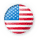

In [317]:
soup.prettify

In [337]:
warning = soup.find('table', border='0')
warning

<table align="center" bgcolor="#FFFFFF" border="0" cellpadding="0" cellspacing="0" width="950">
<tr>
<td valign="top" width="195"><div class="side" id="side">
<div class="box"><div class="hd">Our Products</div><div class="cn">• <a href="/zip-code-database.asp" title="US ZIP Code Database">US ZIP Code Database</a><br/>• <a href="/zip-plus-4-database.asp" title="US ZIP Code Database">US ZIP+4 Database</a><br/>• <a href="/2010-census-database.asp" title="2010 Census Multi Level Database">2010 Census Database</a><br/>• <a href="/canadian-postal-code-database.asp" title="Canadian Database">Canadian Postal Codes</a><br/>• <a href="/map-boundary-data.asp" title="ZIP Code Boundary Data">ZIP Code Boundary Data</a><br/>• <a href="/zip-code-api.asp" title="ZIP Code API">ZIP Code API</a><span class="new"> NEW!</span><br/>• <a href="/area-code-database.asp" title="Area Code Database">Area Code Database</a><br/>• <a href="/zip-code-historical-database.asp" title="Historical Zip Codes">Historical Zip

In [401]:
zip_city_list = warning.find_all('td', class_='label')[1:]
zip_city_list = list(zip_city_list)
zip_city_list

[<td class="label"><a href="/zip-code/98001/zip-code-98001.asp" style="text-decoration:underline;" title="ZIP Code 98001, AUBURN, WA">ZIP Code 98001</a></td>,
 <td class="label"><a href="/zip-code/98002/zip-code-98002.asp" style="text-decoration:underline;" title="ZIP Code 98002, AUBURN, WA">ZIP Code 98002</a></td>,
 <td class="label"><a href="/zip-code/98003/zip-code-98003.asp" style="text-decoration:underline;" title="ZIP Code 98003, FEDERAL WAY, WA">ZIP Code 98003</a></td>,
 <td class="label"><a href="/zip-code/98004/zip-code-98004.asp" style="text-decoration:underline;" title="ZIP Code 98004, BELLEVUE, WA">ZIP Code 98004</a></td>,
 <td class="label"><a href="/zip-code/98005/zip-code-98005.asp" style="text-decoration:underline;" title="ZIP Code 98005, BELLEVUE, WA">ZIP Code 98005</a></td>,
 <td class="label"><a href="/zip-code/98006/zip-code-98006.asp" style="text-decoration:underline;" title="ZIP Code 98006, BELLEVUE, WA">ZIP Code 98006</a></td>,
 <td class="label"><a href="/zip-co

In [458]:
temp = []
for zip in zip_city_list:
    temp.append(str(zip)[114:127])
zip_city_clean = temp
zip_city_clean = [x.split(',') for x in zip_city_clean]
zip_city_clean

[['98001', ' AUBURN'],
 ['98002', ' AUBURN'],
 ['98003', ' FEDERA'],
 ['98004', ' BELLEV'],
 ['98005', ' BELLEV'],
 ['98006', ' BELLEV'],
 ['98007', ' BELLEV'],
 ['98008', ' BELLEV'],
 ['98009', ' BELLEV'],
 ['98010', ' BLACK '],
 ['98011', ' BOTHEL'],
 ['98013', ' BURTON'],
 ['98014', ' CARNAT'],
 ['98015', ' BELLEV'],
 ['98019', ' DUVALL'],
 ['98022', ' ENUMCL'],
 ['98023', ' FEDERA'],
 ['98024', ' FALL C'],
 ['98025', ' HOBART'],
 ['98027', ' ISSAQU'],
 ['98028', ' KENMOR'],
 ['98029', ' ISSAQU'],
 ['98030', ' KENT', ' '],
 ['98031', ' KENT', ' '],
 ['98032', ' KENT', ' '],
 ['98033', ' KIRKLA'],
 ['98034', ' KIRKLA'],
 ['98035', ' KENT', ' '],
 ['98038', ' MAPLE '],
 ['98039', ' MEDINA'],
 ['98040', ' MERCER'],
 ['98041', ' BOTHEL'],
 ['98042', ' KENT', ' '],
 ['98045', ' NORTH '],
 ['98047', ' PACIFI'],
 ['98050', ' PRESTO'],
 ['98051', ' RAVENS'],
 ['98052', ' REDMON'],
 ['98053', ' REDMON'],
 ['98055', ' RENTON'],
 ['98056', ' RENTON'],
 ['98057', ' RENTON'],
 ['98058', ' RENTON

In [482]:
pop_list = warning.find_all('td', class_='info')
pop_list = list(pop_list[12:])
pop_list

[<td class="info">31,647</td>,
 <td class="info">Pacific</td>,
 <td class="info">253</td>,
 <td class="info">General</td>,
 <td class="info"><a href="/city/wa-federal-way.asp" title="Federal Way, WA">Federal Way</a></td>,
 <td class="info">44,151</td>,
 <td class="info">Pacific</td>,
 <td class="info">253</td>,
 <td class="info">General</td>,
 <td class="info"><a href="/city/wa-bellevue.asp" title="Bellevue, WA">Bellevue</a></td>,
 <td class="info">27,946</td>,
 <td class="info">Pacific</td>,
 <td class="info">425</td>,
 <td class="info">General</td>,
 <td class="info"><a href="/city/wa-bellevue.asp" title="Bellevue, WA">Bellevue</a></td>,
 <td class="info">17,714</td>,
 <td class="info">Pacific</td>,
 <td class="info">425</td>,
 <td class="info">General</td>,
 <td class="info"><a href="/city/wa-bellevue.asp" title="Bellevue, WA">Bellevue</a></td>,
 <td class="info">36,364</td>,
 <td class="info">Pacific</td>,
 <td class="info">425</td>,
 <td class="info">General</td>,
 <td class="info

In [483]:
temp_pop = []
print(len(pop_list)//5)
count=0
for pop in range(118):
    temp_pop.append(str(pop_list[count])[17:23])
    count +=5
pop_list = list(temp_pop)
len(pop_list)

118


118

In [479]:
pop_list = [x for x in pop_list if x != '0</td>']
len(pop_list)

79

In [465]:
zip_code_df = pd.DataFrame()

In [484]:
# zip_code_df['population'] = pop_list
zip_code_df['zip_code'] = [x[0] for x in zip_city_clean]
zip_code_df['city'] = [x[1] for x in zip_city_clean]
zip_code_df['zip_from_KC'] = df['zipcode'].unique()
zip_code_df
# zip_code_df['population'] = [x for x in pop_list]

ValueError: Length of values does not match length of index